# __<div align="center">EDP : TP2 - Intégration temporelle</div>__

In [18]:
import matplotlib.pyplot as plt
import numpy as np

### __1. Schéma d'Euler explicite__

##### __1. Implémenter les schémas discrets combinant les discrétisations spatiales FOU et UPO2VF avec le schéma d'Euler explicite__

In [19]:
def FOUEE_u_i_nplus1(rien, u_i_n, u_imoinsun_n, C) :
    return u_i_n - C*(u_i_n - u_imoinsun_n)

def UPO2VF_EE_u_i_nplus1(u_iplusun_n,u_i_n,u_imoinsun_n,u_imoinsdeux_n,C):
    return u_i_n - (C/4)*(u_iplusun_n + 3*u_i_n - 5*u_imoinsun_n + u_imoinsdeux_n)

##### __2. Tester le programme sur les CFLs 0.1, 0.5 et 1. Que peut-on observer avec les deux schémas ?__

In [20]:
C_liste = [0.1, 0.5, 1]

In [22]:
# Constantes

L = 1       # L = 1m
m = 50      # m = 50
x0 = 0.5    # x0 = 0.5m

a = 1       # a = 1m/s

T = 1
deltax = L/m

deltaT_liste = [C_liste[i]*deltax/a for i in range(len(C_liste))]
p_liste = [int(T/deltaT_liste[i]) for i in range(len(deltaT_liste))]

abscisse = np.linspace(0,L,m)


def CI(x,x0):
    return x > x0

u0 = np.vectorize(CI2)(abscisse,x0)

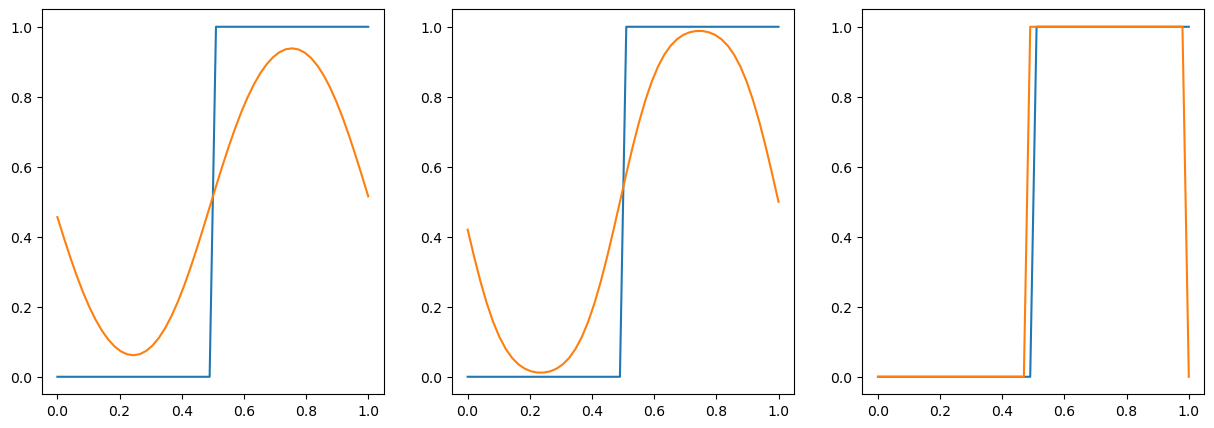

In [23]:
plt.figure(figsize=(15, 5))

for k in range(len(p_liste)) :
    grille_temps_espace_FOUEE = np.zeros((m,p_liste[k]))
    grille_temps_espace_FOUEE[:,0] = u0
    for n in range(1,p_liste[k]) :
        for i in range(m) :
            grille_temps_espace_FOUEE[i,n] = FOUEE_u_i_nplus1(None, grille_temps_espace_FOUEE[i,n - 1], grille_temps_espace_FOUEE[i - 1,n - 1], C_liste[k])

    plt.subplot(1,3,k + 1)

    plt.plot(abscisse, grille_temps_espace_FOUEE[:,0])

    plt.plot(abscisse, grille_temps_espace_FOUEE[:,-1])

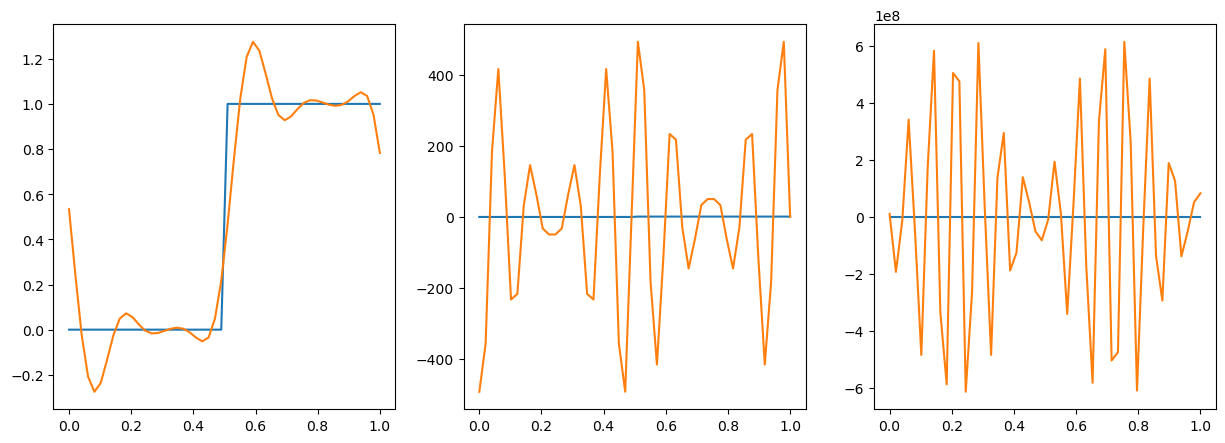

In [24]:
plt.figure(figsize=(15, 5))

for k in range(len(p_liste)) :
    grille_temps_espace_UPO2VF = np.zeros((m,p_liste[k]))
    grille_temps_espace_UPO2VF[:,0] = u0
    for n in range(1,p_liste[k]) :
        for i in range(m) :
            grille_temps_espace_UPO2VF[i,n] = UPO2VF_EE_u_i_nplus1(grille_temps_espace_UPO2VF[(i + 1)%m,n - 1], grille_temps_espace_UPO2VF[i,n - 1], grille_temps_espace_UPO2VF[i - 1,n - 1], grille_temps_espace_UPO2VF[i - 2,n - 1], C_liste[k])

    plt.subplot(1,3,k + 1)

    plt.plot(abscisse, grille_temps_espace_UPO2VF[:,0])

    plt.plot(abscisse, grille_temps_espace_UPO2VF[:,-1])

### __2. Schéma de Runge Kutta explicite d'ordre 2__

In [26]:
def RKexpl2_deltaU_etoile(u_n, C):
    deltaU_etoile_n = np.zeros(len(u_n))
    for i in range(len(u_n)) :
        deltaU_etoile_n[i] = u_n[i] - (C/4)*(u_n[(i+1)%len(u_n)] + 3*u_n[i] - 5*u_n[i - 1] + u_n[i - 2])
    return np.array(deltaU_etoile_n)

# -> Fonctionnement verifié

def RKexpl2_U_etoile(u_n, dt, C):
    #return u_n + dt*deltaU_etoile
    return u_n + dt*RKexpl2_deltaU_etoile(u_n, C)

def RKexpl2_deltaU(u_n, dt, C):
    #deltaU_n = np.zeros((1,p_liste[k]))
    #for i in range(len(u_n)) :
        #deltaU_n[1,i] = UPO2VF_EE_u_i_nplus1(u_etoile[(i+1)%(len(u_n))], u_etoile[i], u_etoile[i-1], u_etoile[i-2]) + (1/2)*deltaU_etoile[1,i]
    deltaU_n = (1/2)*RKexpl2_deltaU_etoile(RKexpl2_U_etoile(u_n, dt, C), C) + (1/2)*RKexpl2_deltaU_etoile(u_n, C)
    #deltaU_n[1,i] = FOUEE_u_i_nplus1(u_etoile[(i+1)%(len(u_n))], u_etoile[i], u_etoile[i-1], u_etoile[i-2]) + (1/2)*deltaU_etoile[1,i]
    return deltaU_n

def RKexpl2_U_nplusun(u_n, dt, C):
    return u_n + dt*RKexpl2_deltaU(u_n, dt, C)



plt.figure(figsize=(15, 5))

for k in range(len(p_liste)) :
    grille_temps_espace_RKexpl2 = np.zeros((m,p_liste[k]))
    grille_temps_espace_RKexpl2[:,0] = np.array(u02)
    for n in range(1,p_liste[k]) :
        #for i in range(m) :
        grille_temps_espace_RKexpl2[:,n] = RKexpl2_U_nplusun(grille_temps_espace_RKexpl2[:,n-1], deltaT_liste[k], C_liste[k])

    plt.subplot(1,3,k + 1)

    plt.plot(abscisse, grille_temps_espace_RKexpl2[:,0])

    plt.plot(abscisse, grille_temps_espace_RKexpl2[:,-1])

NameError: name 'u_etoile' is not defined

<Figure size 1500x500 with 0 Axes>

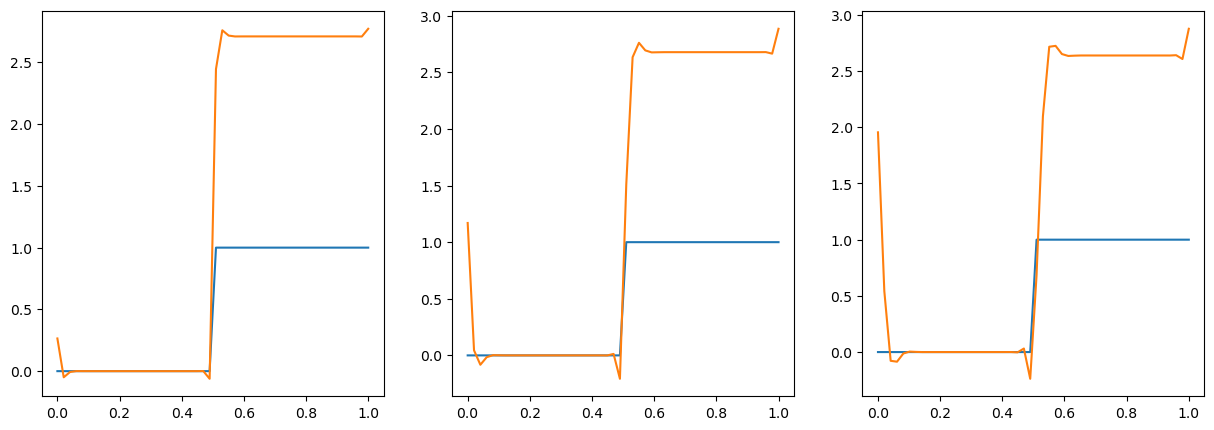

In [10]:
plt.figure(figsize=(15, 5))

for k in range(len(p_liste)) :
    grille_temps_espace_RKexpl2 = np.zeros((m,p_liste[k]))
    grille_temps_espace_RKexpl2[:,0] = np.array(u02)
    for n in range(1,p_liste[k]) :
        #for i in range(m) :
        grille_temps_espace_RKexpl2[:,n] = RKexpl2_U_etoile(grille_temps_espace_RKexpl2[:,n-1], deltaT_liste[k], C_liste[k])

    plt.subplot(1,3,k + 1)

    plt.plot(abscisse, grille_temps_espace_RKexpl2[:,0])

    plt.plot(abscisse, grille_temps_espace_RKexpl2[:,-1])

### __3. Schéma d'Euler implicite__

In [ ]:
def Eulerimp_deltaU(u_n):
    